In [ ]:
import pandas as pd
import geopandas as gp
from shapely.geometry import Point
import polars as pl
import datetime as dt
from pathlib import Path
import seaborn as sns
import colorcet as cc
from matplotlib import pyplot as plt
import matplotlib as mpl
import requests

In [ ]:
sns.set_theme('paper')
sns.set_style('whitegrid')

In [ ]:
DATADIR = Path().absolute().parents[1]  / 'data/AICC_reports'
testfn = 'AK_SituationReportExport_20250702.xlsx'
DATADIR

PosixPath('/Users/chris/Projects/FiWePs/data/AICC_reports')

In [ ]:
pl.read_excel(DATADIR / testfn)

OBJECTID,Fire Number,Unique Fire ID,Incident Name,Acres,Fire Cause,Incident Type,Management Option,Protecting Org,Protecting Office,Owner ID,Ownership at Origin,Discovery Date,Containment Date,Control Date,Out Date,Fire Code,DOF Code,USFS Code,Complex,Last updated,Status,Personnel,Narrative Date,Narrative,Latitude,Longitude
i64,str,str,str,f64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,str,str,f64,f64
1,"""372""","""2025-AKGAD-000372""","""Lynx""",0.1,"""Undetermined""","""WF-Wildfire""","""Modified (Jul 10)""","""AFS""","""Galena Zone (GAD)""","""ANCSA""","""AKNAN-NANA Regional Corporatio…","""7/2/2025 21:01""",null,null,null,"""S469""",null,"""PDS469""",null,"""7/2/2025 23:17""","""Unstaffed/Uncontained""",0,"""7/2/2025""","""No narrative.""",67.013,-156.67305
2,"""370""","""2025-AKFAS-511370""","""Healy Road Coal Seam""",3.0,"""Natural""","""WF-Wildfire""","""Full""","""DOF""","""Fairbanks Area (FAS)""","""State""","""AKDNS-AK DNR-Mental Health Tru…","""7/2/2025 16:08""",null,null,null,"""S457""","""7351137025""","""PNS457""",null,"""7/2/2025 16:26""","""Unstaffed/Uncontained""",0,"""7/2/2025""","""While conducting a reconnaissa…",63.861167,-148.761833
3,"""371""","""2025-AKKKS-503371""","""Sandra""",0.01,"""Human""","""WF-Wildfire""","""Critical""","""DOF""","""Kenai-Kodiak Area (KKS)""","""Private""","""AKPRI-Private""","""7/2/2025 15:04""","""7/2/2025 15:53""","""7/2/2025 15:53""",null,"""S45S""","""7350337125""","""PNS45S""",null,"""7/2/2025 19:06""","""Staffed/Contained""",4,"""7/2/2025""","""On 7/2/25 @ 1502 KESA dispatch…",59.742817,-151.266017
4,"""368""","""2025-AKFAS-511368""","""Farmers Market""",0.1,"""Natural""","""WF-Wildfire""","""Critical""","""DOF""","""Fairbanks Area (FAS)""","""Private""","""AKPRI-Private""","""7/2/2025 12:00""","""7/2/2025 17:28""","""7/2/2025 17:29""",null,"""S44B""","""7351136825""","""PNS44B""",null,"""7/2/2025 16:36""","""Unstaffed/Contained""",0,"""7/2/2025""","""At approximately 1200, FECC re…",64.863134,-147.782293
5,"""369""","""2025-AKTAS-513369""","""F/A Big Creek""",0.0,"""Undetermined""","""FA-False Alarm""","""Limited""","""DOF""","""Tok Area (TAS)""","""State""","""AKDNS-AK Dept. Natural Resourc…","""7/2/2025 11:38""",null,null,null,null,"""7351336925""",null,null,null,null,null,null,null,63.5299,-141.4319
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
404,null,"""2025-AKMSS-250001""","""CY25 Sunset RX""",0.01,"""Human""","""RX-Prescribed Fire""","""Critical""","""DOF""","""Mat-Su Area (MSS)""","""State""","""AKDNS-AK Dept. Natural Resourc…","""1/2/2025 12:36""",null,null,null,null,null,null,null,"""7/2/2025 06:41""",null,0,"""7/2/2025""","""No narrative.""",61.660133,-149.602283
405,null,"""2025-AKFAS-250712""","""2025 Nenana Ridge RX""",0.1,"""Human""","""RX-Prescribed Fire""","""Full""","""DOF""","""Fairbanks Area (FAS)""","""State""","""AKDNS-AK Dept. Natural Resourc…","""1/1/2025 08:47""",null,null,null,null,null,null,null,"""7/2/2025 06:28""",null,0,"""7/2/2025""","""No narrative.""",64.653617,-148.69
406,null,"""2025-AKKKS-250003""","""CY25 Wharf Ave RX""",0.01,"""Human""","""RX-Prescribed Fire""","""Critical""","""DOF""","""Kenai-Kodiak Area (KKS)""","""State""","""AKDNS-AK DNR-Mental Health Tru…","""1/1/2025 08:00""",null,null,null,null,null,null,null,"""7/2/2025 06:41""",null,0,"""7/2/2025""","""No narrative.""",60.487802,-150.866415


In [ ]:
pd.read_excel(DATADIR / testfn)

,OBJECTID,Fire Number,Unique Fire ID,Incident Name,Acres,Fire Cause,Incident Type,Management Option,Protecting Org,Protecting Office,...,DOF Code,USFS Code,Complex,Last updated,Status,Personnel,Narrative Date,Narrative,Latitude,Longitude
0,1,372.0,2025-AKGAD-000372,Lynx,0.10,Undetermined,WF-Wildfire,Modified (Jul 10),AFS,Galena Zone (GAD),...,NaN,PDS469,NaN,7/2/2025 23:17,Unstaffed/Uncontained,0.0,7/2/2025,No narrative.,67.013000,-156.673050
1,2,370.0,2025-AKFAS-511370,Healy Road Coal Seam,3.00,Natural,WF-Wildfire,Full,DOF,Fairbanks Area (FAS),...,7.351137e+09,PNS457,NaN,7/2/2025 16:26,Unstaffed/Uncontained,0.0,7/2/2025,"While conducting a reconnaissance mission, N64...",63.861167,-148.761833
2,3,371.0,2025-AKKKS-503371,Sandra,0.01,Human,WF-Wildfire,Critical,DOF,Kenai-Kodiak Area (KKS),...,7.350337e+09,PNS45S,NaN,7/2/2025 19:06,Staffed/Contained,4.0,7/2/2025,On 7/2/25 @ 1502 KESA dispatched resources to ...,59.742817,-151.266017
3,4,368.0,2025-AKFAS-511368,Farmers Market,0.10,Natural,WF-Wildfire,Critical,DOF,Fairbanks Area (FAS),...,7.351137e+09,PNS44B,NaN,7/2/2025 16:36,Unstaffed/Contained,0.0,7/2/2025,"At approximately 1200, FECC reported an active...",64.863134,-147.782293
4,5,369.0,2025-AKTAS-513369,F/A Big Creek,0.00,Undetermined,FA-False Alarm,Limited,DOF,Tok Area (TAS),...,7.351337e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.529900,-141.431900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,404,NaN,2025-AKMSS-250001,CY25 Sunset RX,0.01,Human,RX-Prescribed Fire,Critical,DOF,Mat-Su Area (MSS),...,NaN,NaN,NaN,7/2/2025 06:41,NaN,0.0,7/2/2025,No narrative.,61.660133,-149.602283
404,405,NaN,2025-AKFAS-250712,2025 Nenana Ridge RX,0.10,Human,RX-Prescribed Fire,Full,DOF,Fairbanks Area (FAS),...,NaN,NaN,NaN,7/2/2025 06:28,NaN,0.0,7/2/2025,No narrative.,64.653617,-148.690000
405,406,NaN,2025-AKKKS-250003,CY25 Wharf Ave RX,0.01,Human,RX-Prescribed Fire,Critical,DOF,Kenai-Kodiak Area (KKS),...,NaN,NaN,NaN,7/2/2025 06:41,NaN,0.0,7/2/2025,No narrative.,60.487802,-150.866415
406,407,NaN,2025-AKKKS-250001,CY25 Morgan''s Landing RX,8.00,Human,RX-Prescribed Fire,Critical,DOF,Kenai-Kodiak Area (KKS),...,7.323600e+09,NaN,NaN,7/2/2025 06:38,NaN,0.0,7/2/2025,No narrative.,60.503372,-150.863667


In [ ]:
URLtemplate_A = "https://fire.ak.blm.gov/content/aicc/Previous%20Situation%20Reports/2025%20Situtation%20Report%20Exports/"
URLtemplate_C = "AK_SituationReportExport_"

# https://fire.ak.blm.gov/content/aicc/Previous%20Situation%20Reports/2025%20Situtation%20Report%20Exports/04_2025/AK_SituationReportExport_20250423.xlsx
# https://fire.ak.blm.gov/content/aicc/Previous%20Situation%20Reports/2025%20Situtation%20Report%20Exports/2025_04/AK_SituationReportExport_20250419.xlsx


fntemplate = 'AK_SituationReportExport_'

In [ ]:
response.headers

{'Date': 'Sun, 06 Jul 2025 08:40:41 GMT', 'Content-Type': 'text/html', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'CF-Cache-Status': 'EXPIRED', 'Expires': 'Sun, 06 Jul 2025 12:40:41 GMT', 'Cache-Control': 'public, max-age=14400', 'Set-Cookie': '__cf_bm=HFZFYibwc43goKGddMxQ.7DVZQMvVnRWg2fgqXfDIoI-1751791241-1.0.1.1-c.JIugv5wdUQnaVOUlrTsI6hbMihFRfulSFnGGE2TjoG6vji_Je_P.PhRusJcwtarxEMMPdt2naiozgQ..Awxc8kJaJEPPBR3BXvjkHSM_8; path=/; expires=Sun, 06-Jul-25 09:10:41 GMT; domain=.blm.gov; HttpOnly; Secure; SameSite=None', 'Vary': 'Accept-Encoding', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Server': 'cloudflare', 'CF-RAY': '95adcc7c2bd9681e-SEA', 'Content-Encoding': 'gzip'}

In [ ]:
for item in pd.date_range('20250415',dt.datetime.now().strftime("%Y%m%d"), freq='d'):
    thedate = item.strftime('%Y%m%d')
    URL = URL = f"{URLtemplate_A}{item.strftime('%m_%Y')}/{URLtemplate_C}{thedate}.xlsx"
    print(URL)
    response = requests.get(URL)
    if response.status_code == 200:
        with open(DATADIR / f"{fntemplate}{thedate}.xlsx", 'wb') as dst:
            dst.write(response.content)
    else:
        URL = f"{URLtemplate_A}{URLtemplate_C}{thedate}.xlsx"
        response = requests.get(URL)
        if response.status_code == 200:
            with open(DATADIR / f"{fntemplate}{thedate}.xlsx", 'wb') as dst:
                dst.write(response.content)


https://fire.ak.blm.gov/content/aicc/Previous%20Situation%20Reports/2025%20Situtation%20Report%20Exports/04_2025/AK_SituationReportExport_20250415.xlsx
https://fire.ak.blm.gov/content/aicc/Previous%20Situation%20Reports/2025%20Situtation%20Report%20Exports/04_2025/AK_SituationReportExport_20250416.xlsx
https://fire.ak.blm.gov/content/aicc/Previous%20Situation%20Reports/2025%20Situtation%20Report%20Exports/04_2025/AK_SituationReportExport_20250417.xlsx
https://fire.ak.blm.gov/content/aicc/Previous%20Situation%20Reports/2025%20Situtation%20Report%20Exports/04_2025/AK_SituationReportExport_20250418.xlsx
https://fire.ak.blm.gov/content/aicc/Previous%20Situation%20Reports/2025%20Situtation%20Report%20Exports/04_2025/AK_SituationReportExport_20250419.xlsx
https://fire.ak.blm.gov/content/aicc/Previous%20Situation%20Reports/2025%20Situtation%20Report%20Exports/04_2025/AK_SituationReportExport_20250420.xlsx
https://fire.ak.blm.gov/content/aicc/Previous%20Situation%20Reports/2025%20Situtation%20

In [ ]:
for ii in pd.date_range('20250415',dt.datetime.now().strftime("%Y%m%d"), freq='d'):
    print(ii.strftime('%Y%m%d'))

20250415
20250416
20250417
20250418
20250419
20250420
20250421
20250422
20250423
20250424
20250425
20250426
20250427
20250428
20250429
20250430
20250501
20250502
20250503
20250504
20250505
20250506
20250507
20250508
20250509
20250510
20250511
20250512
20250513
20250514
20250515
20250516
20250517
20250518
20250519
20250520
20250521
20250522
20250523
20250524
20250525
20250526
20250527
20250528
20250529
20250530
20250531
20250601
20250602
20250603
20250604
20250605
20250606
20250607
20250608
20250609
20250610
20250611
20250612
20250613
20250614
20250615
20250616
20250617
20250618
20250619
20250620
20250621
20250622
20250623
20250624
20250625
20250626
20250627
20250628
20250629
20250630
20250701
20250702
20250703
20250704
20250705
20250706
20250707


In [ ]:
results = []
for fp in DATADIR.glob(f'{fntemplate}*'):
    datestamp = fp.stem[-8:]
    current = pd.read_excel(fp)
    current['reportdate'] = datestamp
    current.drop(columns=['OBJECTID'], inplace=True)
    results.append(current)

In [ ]:
all_updates = pd.concat(results).sort_values(['reportdate'])
all_updates

,Fire Number,Unique Fire ID,Incident Name,Acres,Fire Cause,Incident Type,Management Option,Protecting Org,Protecting Office,Owner ID,...,Status,Personnel,Narrative Date,Narrative,Latitude,Longitude,reportdate,Discovery date,Control date,Out date
38,NaN,2025-AKUYD-250002,Administrative Pile Rx,0.1,Human,RX-Prescribed Fire,Full,AFS,UYD,BLM,...,NaN,0.0,2025-04-09 00:00:00,Ignitions were successful. 1 pile was treated.,67.324217,-150.147300,20250422,2025-03-20 10:43:31,NaT,NaT
28,13.0,2025-AKKKS-503013,Hoyt,0.5,Human,WF-Wildfire,Critical,DOF,KKS,Private,...,Out,0.0,2025-04-04 00:00:00,"Forestry personnel checked on the Hoyt fire, f...",60.642222,-151.312472,20250422,2025-03-30 13:14:00,2025-03-30 15:27:00,2025-04-04 16:20:00
29,12.0,2025-AKMSS-501012,Ridgewood,0.1,Human,WF-Wildfire,Critical,DOF,MSS,Private,...,Out,0.0,2025-03-30 00:00:00,Forestry responded with one engine to a Matcom...,61.602573,-149.505564,20250422,2025-03-30 12:00:42,2025-03-30 12:12:00,2025-03-30 13:33:00
30,11.0,2025-AKMSS-501011,Carrillo,0.1,Human,WF-Wildfire,Critical,DOF,MSS,Private,...,Out,0.0,2025-03-28 00:00:00,Forestry personnel responded to an outdoor gra...,61.619278,-149.712778,20250422,2025-03-28 15:45:56,2025-03-28 16:17:00,2025-03-28 16:17:00
32,9.0,2025-AKMSS-501009,Down Wind,0.3,Natural,WF-Wildfire,Critical,DOF,MSS,Private,...,Out,0.0,2025-04-04 00:00:00,"Forestry personnel checked on the fire, found ...",61.566389,-149.303583,20250422,2025-03-27 15:31:00,2025-03-27 16:26:00,2025-04-04 16:42:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,269.0,2025-AKUYD-000269,Salmon Trout,1303.0,Natural,WF-Wildfire,Limited,AFS,Upper Yukon Zone (UYD),USFWS,...,Unstaffed/Uncontained,0.0,6/26/2025,An agency aircraft flew reconnaissance of the ...,66.830000,-141.540000,20250706,NaT,NaT,NaT
143,271.0,2025-AKTAD-000271,Live Trap,2416.0,Natural,WF-Wildfire,Limited,AFS,Tanana Zone (TAD),NPS,...,Unstaffed/Uncontained,0.0,6/21/2025,An agency aircraft flew reconnaissance of the ...,63.530000,-152.120000,20250706,NaT,NaT,NaT
142,272.0,2025-AKTAD-000272,Maroon,139.0,Natural,WF-Wildfire,Limited,AFS,Tanana Zone (TAD),State,...,Unstaffed/Uncontained,0.0,6/21/2025,An agency aircraft flew reconnaissance of the ...,63.535000,-153.296667,20250706,NaT,NaT,NaT
153,261.0,2025-AKTAD-000261,Easter,471.0,Natural,WF-Wildfire,Limited,AFS,Tanana Zone (TAD),NPS,...,Unstaffed/Uncontained,0.0,6/23/2025,updated acreage from most recent remote sensin...,68.050000,-153.990000,20250706,NaT,NaT,NaT


In [ ]:
all_updates['reportdate'] = pd.to_datetime(all_updates['reportdate'])

/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_26076/1397441282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_updates['reportdate'] = pd.to_datetime(all_updates['reportdate'])


In [ ]:
all_updates = all_updates.query("`Incident Type` != 'RX-Prescribed Fire'")

In [ ]:
all_updates[['reportdate', 'Acres']]

,reportdate,Acres
28,2025-04-22,0.5
29,2025-04-22,0.1
30,2025-04-22,0.1
32,2025-04-22,0.3
33,2025-04-22,0.1
...,...,...
144,2025-07-06,1303.0
143,2025-07-06,2416.0
142,2025-07-06,139.0
153,2025-07-06,471.0


In [ ]:
dailyarea = all_updates[['reportdate', 'Acres']].resample('D', on='reportdate').sum()

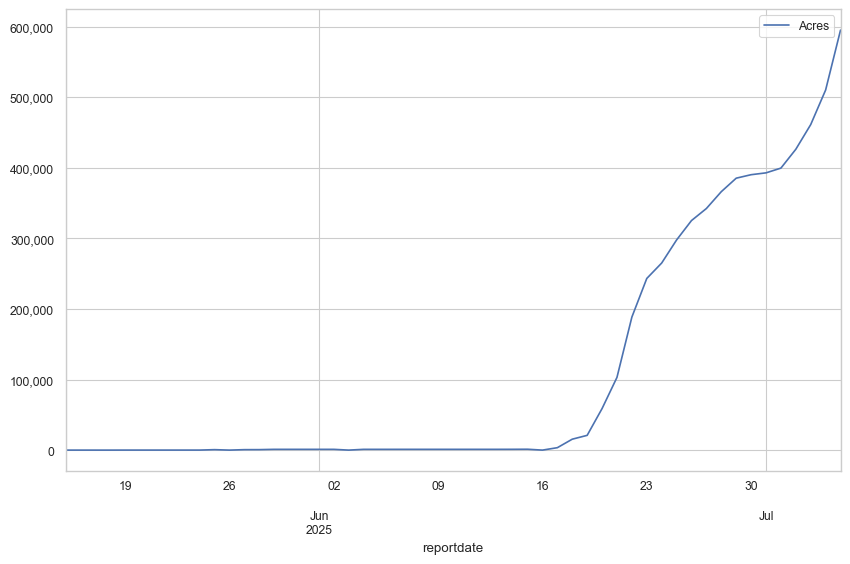

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
dailyarea.loc['2025-05-15':].plot(ax=ax)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# ax.xaxis.grid(False)
# xticks = pd.date_range(start=dailystrikes.index.min(), end=dailystrikes.index.max(), freq='SMS')
# ax.set_xticks(xticks.map(lambda d: dailystrikes.index.get_loc(d)))
# ax.set_xticklabels(xticks.strftime('%d %b %Y'), rotation=45, ha='right')

## By PSA

In [ ]:
testrow = all_updates.iloc[4]

def get_psa(row):
    return Point(row.Longitude, row.Latitude)

In [ ]:
geometry = gp.points_from_xy(all_updates['Longitude'], all_updates['Latitude'])
all_updates_GDF = gp.GeoDataFrame(all_updates, geometry=geometry, crs="EPSG:4326")

In [ ]:
psafp = Path().absolute().parents[0] / "resources/AK_predictive_service_areas.json"
psa_GDF = gp.read_file(psafp)
psa_GDF.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
joined_GDF = gp.sjoin(all_updates_GDF, psa_GDF, predicate='within', how='inner')

In [ ]:
joined_GDF

,Fire Number,Unique Fire ID,Incident Name,Acres,Fire Cause,Incident Type,Management Option,Protecting Org,Protecting Office,Owner ID,...,reportdate,Discovery date,Control date,Out date,geometry,index_right,GACC,PSA_NAME,NAT_CODE,ID
28,13.0,2025-AKKKS-503013,Hoyt,0.5,Human,WF-Wildfire,Critical,DOF,KKS,Private,...,2025-04-22,2025-03-30 13:14:00,2025-03-30 15:27:00,2025-04-04 16:20:00,POINT (-151.31247 60.64222),5,Alaska,Kenai Peninsula,AK14,5
29,12.0,2025-AKMSS-501012,Ridgewood,0.1,Human,WF-Wildfire,Critical,DOF,MSS,Private,...,2025-04-22,2025-03-30 12:00:42,2025-03-30 12:12:00,2025-03-30 13:33:00,POINT (-149.50556 61.60257),4,Alaska,Matanuska Valley and Anchorage,AK13,4
30,11.0,2025-AKMSS-501011,Carrillo,0.1,Human,WF-Wildfire,Critical,DOF,MSS,Private,...,2025-04-22,2025-03-28 15:45:56,2025-03-28 16:17:00,2025-03-28 16:17:00,POINT (-149.71278 61.61928),4,Alaska,Matanuska Valley and Anchorage,AK13,4
32,9.0,2025-AKMSS-501009,Down Wind,0.3,Natural,WF-Wildfire,Critical,DOF,MSS,Private,...,2025-04-22,2025-03-27 15:31:00,2025-03-27 16:26:00,2025-04-04 16:42:00,POINT (-149.30358 61.56639),4,Alaska,Matanuska Valley and Anchorage,AK13,4
33,8.0,2025-AKMSS-501008,Baron,0.1,Human,WF-Wildfire,Critical,DOF,MSS,Private,...,2025-04-22,2025-03-27 14:28:00,2025-03-27 14:59:00,2025-03-27 16:03:00,POINT (-149.27758 61.63419),4,Alaska,Matanuska Valley and Anchorage,AK13,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,269.0,2025-AKUYD-000269,Salmon Trout,1303.0,Natural,WF-Wildfire,Limited,AFS,Upper Yukon Zone (UYD),USFWS,...,2025-07-06,NaT,NaT,NaT,POINT (-141.54 66.83),12,Alaska,Upper Yukon Valley,AK02,12
143,271.0,2025-AKTAD-000271,Live Trap,2416.0,Natural,WF-Wildfire,Limited,AFS,Tanana Zone (TAD),NPS,...,2025-07-06,NaT,NaT,NaT,POINT (-152.12 63.53),8,Alaska,Tanana Zone-South,AK03S,8
142,272.0,2025-AKTAD-000272,Maroon,139.0,Natural,WF-Wildfire,Limited,AFS,Tanana Zone (TAD),State,...,2025-07-06,NaT,NaT,NaT,POINT (-153.29667 63.535),8,Alaska,Tanana Zone-South,AK03S,8
153,261.0,2025-AKTAD-000261,Easter,471.0,Natural,WF-Wildfire,Limited,AFS,Tanana Zone (TAD),NPS,...,2025-07-06,NaT,NaT,NaT,POINT (-153.99 68.05),15,Alaska,North Slope,AK00,15


In [ ]:
joined_GDF['point_index'] = joined_GDF.index

In [ ]:
first_polygons = joined_GDF.groupby('point_index').first()

In [ ]:
first_polygons = first_polygons.reset_index()
first_polygons

,point_index,Fire Number,Unique Fire ID,Incident Name,Acres,Fire Cause,Incident Type,Management Option,Protecting Org,Protecting Office,...,reportdate,Discovery date,Control date,Out date,geometry,index_right,GACC,PSA_NAME,NAT_CODE,ID
0,0,34.0,2025-AKTNF-000034,Strawberry,0.1,Human,WF-Wildfire,Critical,USFS,TNF,...,2025-04-22,2025-04-20 08:14:00,2025-04-20 08:32:00,2025-04-23 14:33:00,POINT (-139.58639 59.44917),1,Alaska,Northern Panhandle,AK15,1
1,1,31.0,2025-AKKKS-503031,Lake,0.1,Human,WF-Wildfire,Critical,DOF,KKS,...,2025-04-22,2025-04-16 16:56:00,2025-04-16 17:44:00,NaT,POINT (-150.73641 60.50239),5,Alaska,Kenai Peninsula,AK14,5
2,2,30.0,2025-AKKKS-503030,Morraine Vista,0.1,Human,WF-Wildfire,Critical,DOF,KKS,...,2025-04-22,2025-04-16 12:47:00,2025-04-16 13:26:00,2025-04-23 14:33:00,POINT (-151.24655 60.33268),5,Alaska,Kenai Peninsula,AK14,5
3,3,29.0,2025-AKKKS-503029,Midway,0.1,Human,WF-Wildfire,Critical,DOF,KKS,...,2025-04-22,2025-04-16 12:21:04,2025-04-16 13:56:00,2025-04-22 13:42:00,POINT (-150.73624 60.51952),5,Alaska,Kenai Peninsula,AK14,5
4,4,28.0,2025-AKDAS-512028,Dog Motel,0.1,Human,WF-Wildfire,Critical,DOF,DAS,...,2025-04-22,2025-04-16 12:01:53,2025-04-16 12:52:00,2025-04-16 12:52:00,POINT (-145.8233 64.14227),6,Alaska,Tanana Valley-West,AK01W,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,430,4.0,2025-AKKKS-503004,Scout Lake,0.1,Human,WF-Wildfire,Critical,DOF,Kenai-Kodiak Area (KKS),...,2025-07-06,NaT,NaT,NaT,POINT (-150.8376 60.51708),5,Alaska,Kenai Peninsula,AK14,5
428,431,3.0,2025-AKKKS-503003,Venture,0.1,Human,WF-Wildfire,Critical,DOF,Kenai-Kodiak Area (KKS),...,2025-07-06,NaT,NaT,NaT,POINT (-151.7895 59.86217),5,Alaska,Kenai Peninsula,AK14,5
429,432,2.0,2025-AKMSS-501002,Sasbo Bluff,1.2,Human,WF-Wildfire,Critical,DOF,Mat-Su Area (MSS),...,2025-07-06,NaT,NaT,NaT,POINT (-149.63728 61.63547),4,Alaska,Matanuska Valley and Anchorage,AK13,4
430,433,1.0,2025-AKTNF-000001,30 Mile,0.1,Human,VF-Vehicle Fire,Full,USFS,Tongass N.F. (TNF),...,2025-07-06,NaT,NaT,NaT,POINT (-134.85817 58.54986),2,Alaska,Central Panhandle,AK16,2


In [ ]:
psa_GDF

,GACC,PSA_NAME,NAT_CODE,ID,geometry
0,Alaska,Kuskokwim Valley,AK09,0,"POLYGON ((-153.92177 63.67527, -153.91623 63.6..."
1,Alaska,Northern Panhandle,AK15,1,"MULTIPOLYGON (((-139.14622 60.18395, -139.1744..."
2,Alaska,Central Panhandle,AK16,2,"MULTIPOLYGON (((-133.79152 58.68218, -133.6967..."
3,Alaska,Southern Panhandle,AK17,3,"MULTIPOLYGON (((-132.25778 57.20999, -132.3713..."
4,Alaska,Matanuska Valley and Anchorage,AK13,4,"MULTIPOLYGON (((-148.28488 62.34603, -148.2766..."
5,Alaska,Kenai Peninsula,AK14,5,"MULTIPOLYGON (((-148.4281 61.08596, -148.42019..."
6,Alaska,Tanana Valley-West,AK01W,6,"POLYGON ((-145.15266 63.30788, -145.16102 63.3..."
7,Alaska,Susitna Valley,AK11,7,"MULTIPOLYGON (((-147.56895 63.55131, -147.5627..."
8,Alaska,Tanana Zone-South,AK03S,8,"POLYGON ((-149.71597 65.84884, -149.70732 65.8..."
9,Alaska,Koyukuk and Upper Kobuk,AK04,9,"MULTIPOLYGON (((-165.85467 68.7508, -162.92999..."


In [ ]:
dailyarea_NS = joined_GDF.query('PSA_NAME == "North Slope"')[['reportdate', 'Acres']].resample('D', on='reportdate').sum()

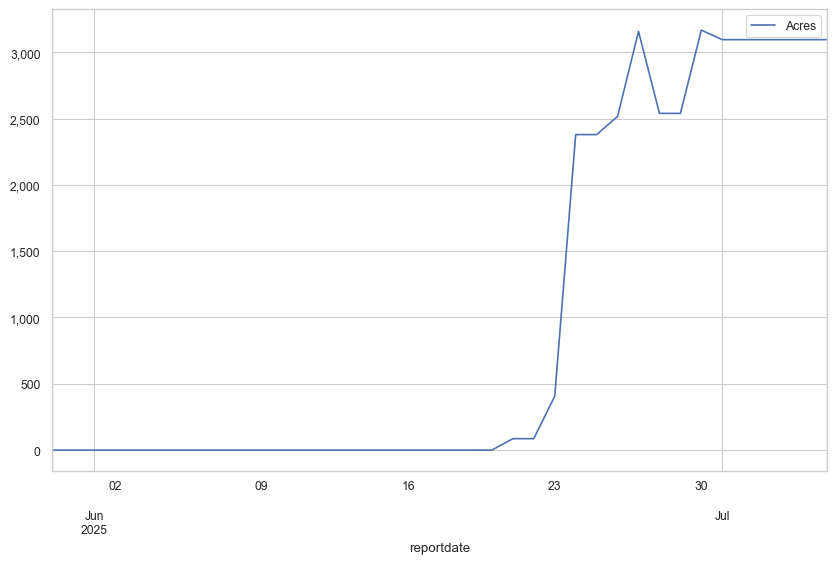

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
dailyarea_NS.loc['2025-05-15':].plot(ax=ax)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

In [ ]:
dailyarea_TVW = joined_GDF.query('PSA_NAME == "Tanana Valley-West"')[['reportdate', 'Acres']].resample('D', on='reportdate').sum()

Text(0.5, 1.0, 'Tanana Valley-West, 2025')

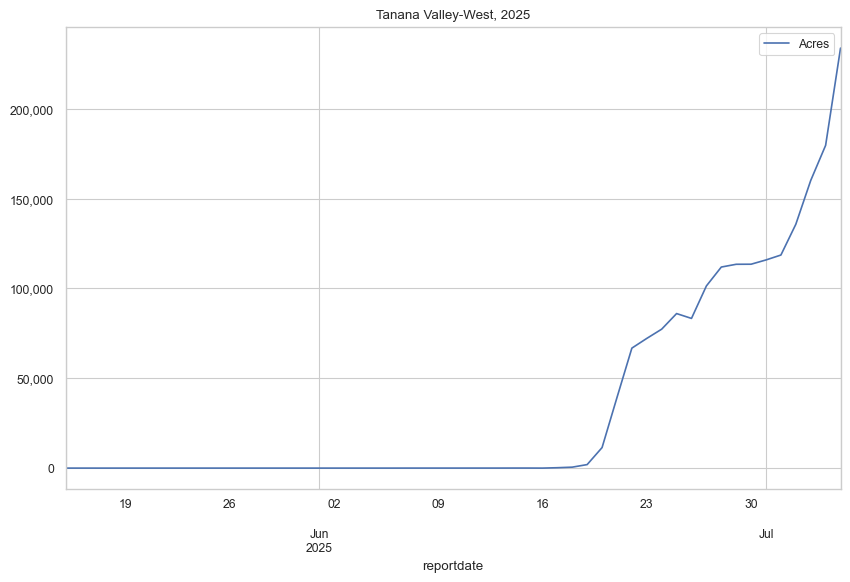

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
dailyarea_TVW.loc['2025-05-15':].plot(ax=ax)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_title("Tanana Valley-West, 2025")

In [ ]:
dailyarea_byPSA = joined_GDF[['reportdate', 'Acres', 'PSA_NAME']].groupby(['reportdate', 'PSA_NAME']).sum().reset_index()

In [ ]:
dailyarea_byPSA

,reportdate,PSA_NAME,Acres
0,2025-04-22,Central Panhandle,0.200000
1,2025-04-22,Kenai Peninsula,1.410000
2,2025-04-22,Matanuska Valley and Anchorage,3.210000
3,2025-04-22,Northern Panhandle,0.300000
4,2025-04-22,Tanana Valley-West,0.210000
...,...,...,...
801,2025-07-06,Tanana Valley-West,233676.080000
802,2025-07-06,Tanana Zone-North,24151.000000
803,2025-07-06,Tanana Zone-South,46848.413774
804,2025-07-06,Upper Yukon Valley,100066.550000


In [ ]:
custom_palette = sns.color_palette("viridis", 24)

In [ ]:
big_fires_PSAS = dailyarea_byPSA[dailyarea_byPSA.Acres > 1000].sort_values('Acres', ascending=False).drop_duplicates('PSA_NAME').PSA_NAME.to_list()
big_fires_PSAS

['Tanana Valley-West',
 'Upper Yukon Valley',
 'Middle Yukon',
 'Tanana Valley-East',
 'Tanana Zone-South',
 'Lower Yukon',
 'Tanana Zone-North',
 'Koyukuk and Upper Kobuk',
 'Copper River Basin',
 'Kuskokwim Valley',
 'Seward Peninsula',
 'North Slope']

In [ ]:
dailyarea_byPSA_forplot = dailyarea_byPSA[dailyarea_byPSA.PSA_NAME.isin(big_fires_PSAS)].loc['2025-05-15':]
dailyarea_byPSA_forplot.PSA_NAME = dailyarea_byPSA_forplot.PSA_NAME.astype("category")
dailyarea_byPSA_forplot.PSA_NAME = dailyarea_byPSA_forplot.PSA_NAME.cat.set_categories(big_fires_PSAS)
dailyarea_byPSA_forplot.sort_values("PSA_NAME", inplace=True)

/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_26076/37655317.py:2: UserWarning: The palette list has more values (21) than needed (12), which may not be intended.
  sns.lineplot(data=dailyarea_byPSA_forplot, x='reportdate', y='Acres',


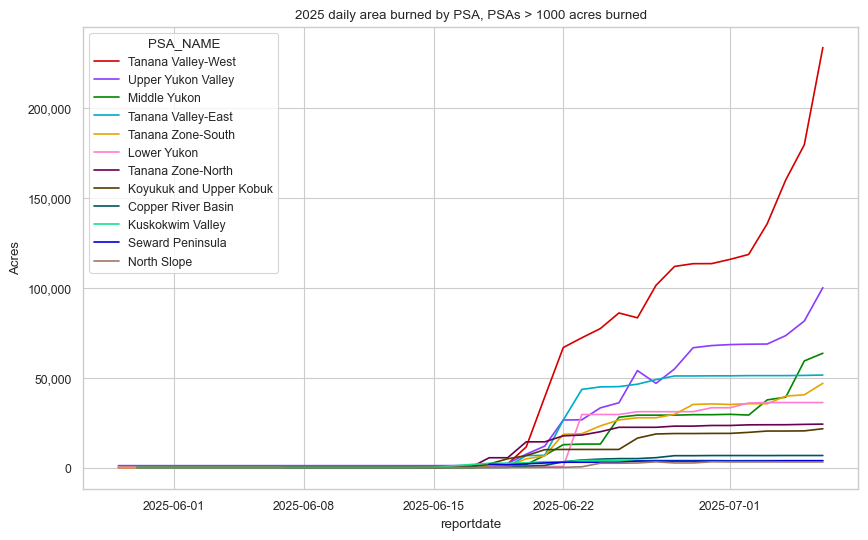

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=dailyarea_byPSA_forplot, x='reportdate', y='Acres', 
             hue='PSA_NAME', ax=ax, palette=sns.color_palette(cc.glasbey_dark, n_colors=len(psa_GDF)))
plt.title("2025 daily area burned by PSA, PSAs > 1000 acres burned")
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))